In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
df_ohe = pd.get_dummies(df,columns=['gender','Partner','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','MultipleLines','PaymentMethod'],drop_first=True)	
df_ohe= df_ohe.replace({True:1,False:0})
df_ohe['TotalCharges']= pd.to_numeric(df_ohe['TotalCharges'], errors='coerce')
df_ohe['TotalCharges'].fillna(0, inplace=True)
df_ohe.head()
X = df_ohe.drop(['customerID','Churn'],axis=1)
y = y = df['Churn'].map({'Yes': 1, 'No': 0})

C:\Users\cc\AppData\Local\Temp\ipykernel_18180\3210443728.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ohe= df_ohe.replace({True:1,False:0})
C:\Users\cc\AppData\Local\Temp\ipykernel_18180\3210443728.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ohe['TotalCharges'].fillna(0, inplac

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=2)

In [95]:
lgr = LogisticRegression(max_iter=2000)

In [61]:
# lgr.fit(X_train,y_train)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [96]:
df_ohe.isna().any()

customerID                               False
SeniorCitizen                            False
tenure                                   False
MonthlyCharges                           False
TotalCharges                             False
Churn                                    False
gender_Male                              False
Partner_Yes                              False
Dependents_Yes                           False
PhoneService_Yes                         False
InternetService_Fiber optic              False
InternetService_No                       False
OnlineSecurity_No internet service       False
OnlineSecurity_Yes                       False
OnlineBackup_No internet service         False
OnlineBackup_Yes                         False
DeviceProtection_No internet service     False
DeviceProtection_Yes                     False
TechSupport_No internet service          False
TechSupport_Yes                          False
StreamingTV_No internet service          False
StreamingTV_Y

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   int64  
 5   Partner_Yes                            7043 non-null   int64  
 6   Dependents_Yes                         7043 non-null   int64  
 7   PhoneService_Yes                       7043 non-null   int64  
 8   InternetService_Fiber optic            7043 non-null   int64  
 9   InternetService_No                     7043 non-null   int64  
 10  OnlineSecurity_No internet service     7043 non-null   int64  
 11  Onli

In [84]:
# lgr.fit(X_train,y_train)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [93]:
# lgr.fit(X_train,y_train)
df_ohe['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [98]:
lgr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [108]:
y_pred = lgr.predict(X_test)

In [109]:
cm = confusion_matrix(y_test,y_pred)

In [110]:
display= ConfusionMatrixDisplay(confusion_matrix=cm)

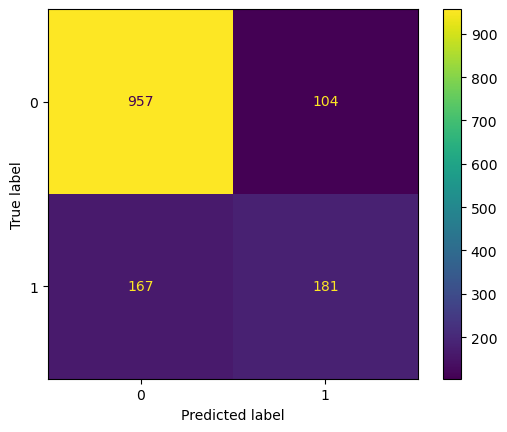

In [111]:
display.plot()
plt.show()

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1061
           1       0.64      0.52      0.57       348

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [118]:
y.value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [119]:
lgr = LogisticRegression(class_weight='balanced', max_iter=5000)
lgr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [123]:
y_p = lgr.predict(X_test)

In [124]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1061
           1       0.49      0.77      0.60       348

    accuracy                           0.75      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.81      0.75      0.76      1409



In [125]:
import joblib
joblib.dump(lgr, "churn_model.pkl")
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']